In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [2]:
output_dir = list(os.listdir('../output'))

In [3]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [4]:
df_all = df_template[:]
for file in output_dir:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [5]:
datasets = list(os.listdir('../datasets'))

In [6]:
for ds in datasets:
    output_dataset = list(filter(lambda x: fnmatch.fnmatch(x, '*' + ds + '*'), output_dir))
    
df_all = df_template[:]

for file in output_dataset:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [5]:
df_all['cost'] = df_all.index

In [6]:
pyhard_datasets = df_all[df_all.strategy == 'Highest Usefulness Sampling']['dataset'].unique()

In [7]:
df_all = df_all[df_all.dataset.isin(pyhard_datasets)]

### Groupby por dataset

In [10]:
df = df_all[:]

In [22]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [40]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset                    package  strategy              classifier                 
1504_steel-plates-fault    baseline baseline              C4.5            0.023393   
1526_wall-robot-navigation baseline baseline              RF              1.188012   
                                                          C4.5            0.015415   
                           modAL    Expected Model Change C4.5            2.473515   
                                    Query by Committee    RF            773.426604   
...                                                                            ...   
1549_autoUniv-au6-750      modAL    Random Sampling       5NN            21.505677   
1555_autoUniv-au6-1000     modAL    Random Sampling       5NN            19.168471   
1549_autoUniv-au6-750      baseline baseline              5NN             0.021899   
1554_autoUniv-au7-500      baseline baseline              NB              0.014757   
1549_autoUniv-au6-750      baseline baseline              NB              0.027767   

                                                                      sample_size  \
dataset                    package  strategy              classifier                
1504_steel-plates-fault    baseline baseline              C4.5         291.000000   
1526_wall-robot-navigation baseline baseline              RF           818.000000   
                                                          C4.5         818.000000   
                           modAL    Expected Model Change C4.5           0.450330   
                                    Query by Committee    RF             2.701979   
...                                                                           ...   
1549_autoUniv-au6-750      modAL    Random Sampling       5NN            1.204000   
1555_autoUniv-au6-1000     modAL    Random Sampling       5NN            1.144000   
1549_autoUniv-au6-750      baseline baseline              5NN          112.000000   
1554_autoUniv-au7-500      baseline baseline              NB            75.000000   
1549_autoUniv-au6-750      baseline baseline              NB           112.000000   

                                                                      accuracy_history  \
dataset                    package  strategy              classifier                     
1504_steel-plates-fault    baseline baseline              C4.5                1.000000   
1526_wall-robot-navigation baseline baseline              RF                  1.000000   
                                                          C4.5                0.999267   
                           modAL    Expected Model Change C4.5                0.999246   
                                    Query by Committee    RF                  0.999155   
...                                                                                ...   
1549_autoUniv-au6-750      modAL    Random Sampling       5NN                 0.160670   
1555_autoUniv-au6-1000     modAL    Random Sampling       5NN                 0.156229   
1549_autoUniv-au6-750      baseline baseline              5NN                 0.157895   
1554_autoUniv-au7-500      baseline baseline              NB                  0.176000   
1549_autoUniv-au6-750      baseline baseline              NB                  0.126316   

                                                                      f1_history  
dataset                    package  strategy              classifier              
1504_steel-plates-fault    baseline baseline              C4.5          1.000000  
1526_wall-robot-navigation baseline baseline              RF            1.000000  
                                                          C4.5          0.999267  
                           modAL    Expected Model Change C4.5          0.999246  
                                    Query by Committee    RF            0.999154  
...                                                                          ...  
1549_autoU

In [20]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  sample_size  \
package  strategy                     classifier                              
modAL    Query by Committee           RF           1048.069643     2.711101   
                                      C4.5           78.148298     2.711101   
Pyhard   Highest LSC Sampling         RF            207.176889     0.992642   
         Highest Usefulness Sampling  RF            202.684749     0.992642   
         Lowest H, Highest U Sampling RF            211.017426     0.992642   
modAL    Uncertain Sampling           RF             26.644545     0.356680   
Pyhard   Lowest N1 Sampling           RF            202.919407     0.992642   
         Lowest Harmfulness Sampling  RF            202.455608     0.992642   
         Lowest N2 Sampling           RF            205.414964     0.992642   
         Highest Usefulness Sampling  C4.5          155.914047     0.992642   
         Highest LSC Sampling         C4.5          146.233349     0.992642   
         Lowest H, Highest U Sampling C4.5          146.742912     0.992642   
         Lowest F3 Sampling           RF            247.622181     0.991744   
         Lowest Harmfulness Sampling  C4.5          146.743302     0.992642   
         Lowest N1 Sampling           C4.5          145.025058     0.992642   
         Lowest N2 Sampling           C4.5          146.863243     0.992642   
         Lowest F3 Sampling           C4.5          159.539683     0.991744   
modAL    Expected Model Change        RF             72.747933     0.936225   
baseline baseline                     RF              1.199918   497.111111   
modAL    Expected Model Change        C4.5            8.593056     0.853682   
baseline baseline                     C4.5            0.034568   497.111111   
modAL    Random Sampling              RF             50.345311     1.043138   
         Uncertain Sampling           C4.5            2.602982     0.105927   
                                      5NN            70.960533     0.345847   
Pyhard   Lowest N1 Sampling           5NN           236.187520     0.992642   
         Highest Usefulness Sampling  5NN           226.098730     0.991744   
         Highest LSC Sampling         5NN           232.767899     0.991767   
         Lowest H, Highest U Sampling 5NN           226.794007     0.991767   
         Lowest Harmfulness Sampling  5NN           227.521586     0.991744   
         Lowest F3 Sampling           5NN           225.367217     0.991744   
         Lowest N2 Sampling           5NN           230.170689     0.992330   
modAL    Random Sampling              C4.5            4.006313     1.043138   
baseline baseline                     5NN             0.072112   497.111111   
modAL    Expected Model Change        5NN           130.424089     0.724993   
         Query by Committee           5NN           656.208222     2.711101   
Pyhard   Lowest N2 Sampling           NB            143.668387     0.992642   
         Highest LSC Sampling         NB            142.636879     0.992642   
         Lowest N1 Sampling           NB            141.586522     0.992642   
         Lowest Harmfulness Sampling  NB            145.349805     0.992642   
         Highest Usefulness Sampling  NB            142.857047     0.992642   
modAL    Random Sampling              5NN            71.218676     1.043138   
         Expected Model Change        NB              8.445222     0.571007   
Pyhard   Lowest H, Highest U Sampling NB            141.404994     0.992642   
modAL    Uncertain Sampling           NB              3.153356     0.262972   
         Query by Committee           NB             86.662039     2.711101   
         Random Sampling              NB              4.571816     1.043138   
baseline baseline                     NB              0.027487   497.111111   
Pyhard   Lowest F3 Sampling           NB            160.219988     0.991744   

                                                  accuracy_history  f1_history  
package  strategy 

In [24]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset                    package  strategy                     classifier                 
1050_pc3                   Pyhard   Lowest Harmfulness Sampling  NB              0.193472   
                                    Lowest H, Highest U Sampling NB              0.128380   
                                    Highest LSC Sampling         NB              0.178254   
1549_autoUniv-au6-750      modAL    Query by Committee           C4.5            0.202333   
1050_pc3                   Pyhard   Highest Usefulness Sampling  NB              0.379951   
...                                                                                   ...   
1526_wall-robot-navigation baseline baseline                     RF              0.486123   
1069_pc2                   baseline baseline                     5NN             0.063016   
                           Pyhard   Lowest F3 Sampling           5NN             4.605278   
1541_volcanoes-d4          baseline baseline                     5NN             0.061208   
1056_mc1                   Pyhard   Lowest F3 Sampling           5NN             8.826698   

                                                                             sample_size  \
dataset                    package  strategy                     classifier                
1050_pc3                   Pyhard   Lowest Harmfulness Sampling  NB                  0.0   
                                    Lowest H, Highest U Sampling NB                  0.0   
                                    Highest LSC Sampling         NB                  0.0   
1549_autoUniv-au6-750      modAL    Query by Committee           C4.5                0.0   
1050_pc3                   Pyhard   Highest Usefulness Sampling  NB                  0.0   
...                                                                                  ...   
1526_wall-robot-navigation baseline baseline                     RF                  0.0   
1069_pc2                   baseline baseline                     5NN                 0.0   
                           Pyhard   Lowest F3 Sampling           5NN                 0.0   
1541_volcanoes-d4          baseline baseline                     5NN                 0.0   
1056_mc1                   Pyhard   Lowest F3 Sampling           5NN                 0.0   

                                                                             accuracy_history  \
dataset                    package  strategy                     classifier                     
1050_pc3                   Pyhard   Lowest Harmfulness Sampling  NB                  0.298667   
                                    Lowest H, Highest U Sampling NB                  0.253537   
                                    Highest LSC Sampling         NB                  0.274566   
1549_autoUniv-au6-750      modAL    Query by Committee           C4.5                0.302673   
1050_pc3                   Pyhard   Highest Usefulness Sampling  NB                  0.263549   
...                                                                                       ...   
1526_wall-robot-navigation baseline baseline                     RF                  0.000000   
1069_pc2                   baseline baseline                     5NN                 0.000000   
                           Pyhard   Lowest F3 Sampling           5NN                 0.000000   
1541_volcanoes-d4          baseline baseline                     5NN                 0.000000   
1056_mc1                   Pyhard   Lowest F3 Sampling           5NN                 0.000000   

                                                                             f1_history  
dataset                    package  strategy                     classifier              
1050_pc3                   Pyhard   Lowest Harmfulness Sampling  NB            0.320803  
                                    Lowest H, Highest U Sampling NB            0.305969  
                                    Highest LSC 

In [26]:
### Groupby por dataset

df = pd.DataFrame.from_dict(total_performance_history)

# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

df.groupby(['dataset','package','strategy', 'classifier']).mean().sort_values("f1_history", ascending = False)

df.groupby(['dataset','package','strategy', 'classifier']).std().sort_values("f1_history", ascending = False)

ax = sns.boxplot(data=df_last_result, x="accuracy_history", y="Strategy", orient="h"
                )

ax = sns.boxplot(data=df_last_result, x="f1_history", y="Strategy", orient="h"
                )

## Boxplot

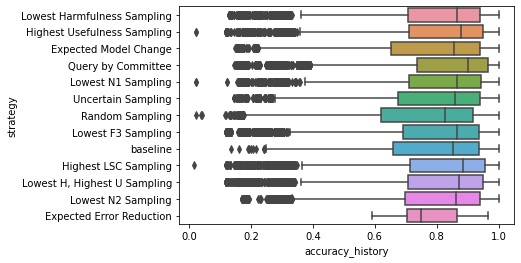

In [11]:
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h")

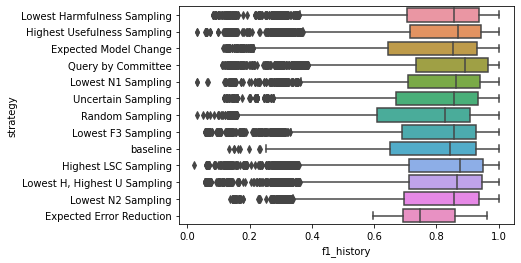

In [12]:
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h"
                )

## Testes (lineplot)

In [17]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


k_legend = []
for idx,pht in enumerate(performance_history_total):
    ax.plot(pht)
    ax.scatter(range(len(pht)), pht, s=13)
    k_legend.append('k = ' + str(k_neighbor[idx]))

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title("Incremental classification accuracy with {n_queries} queries".format(n_queries = N_QUERIES))
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
ax.legend(k_legend, loc='lower right')

plt.show()

[None]

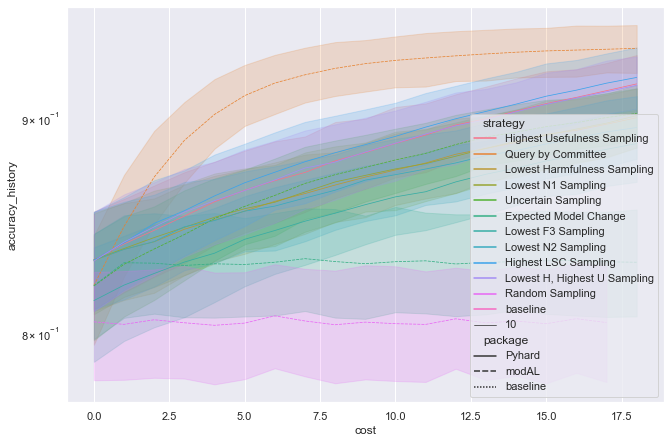

In [13]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

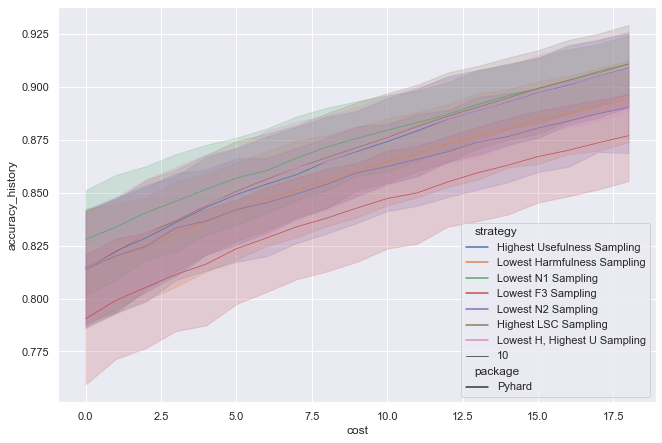

In [48]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package == "Pyhard") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10)

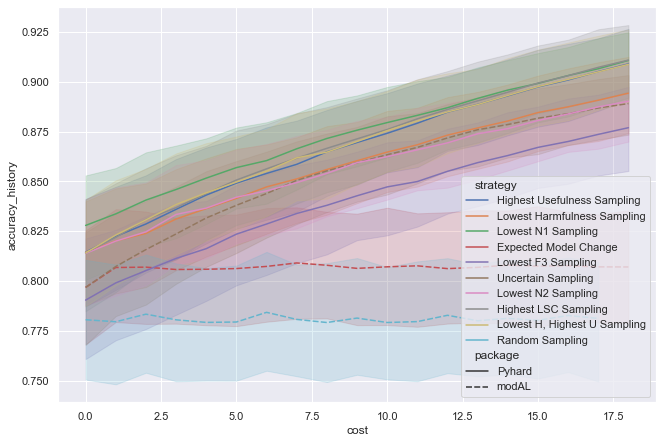

In [49]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package != "baseline") & (df_all.strategy != "Query by Committee") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')])

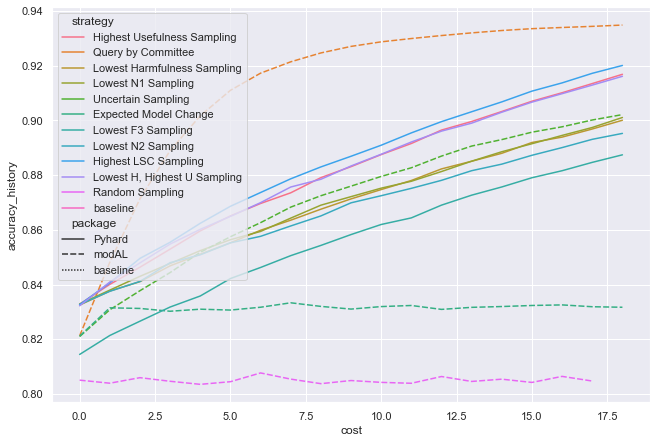

In [19]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", ci=None, style="package",
             data=df_all[(df_all.classifier == "RF")])

## Heatmap

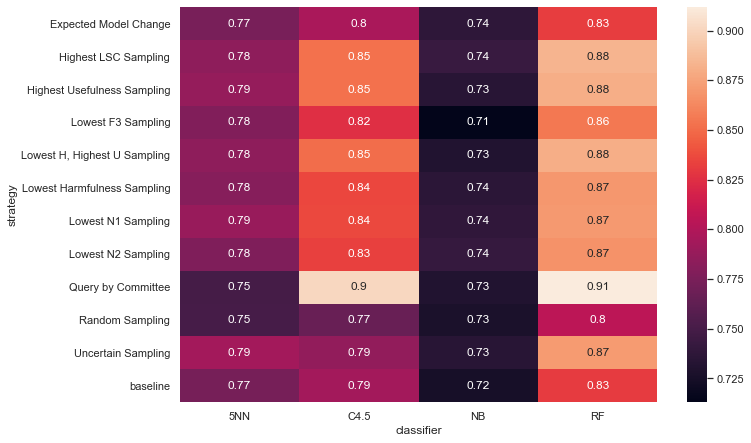

In [15]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='accuracy_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

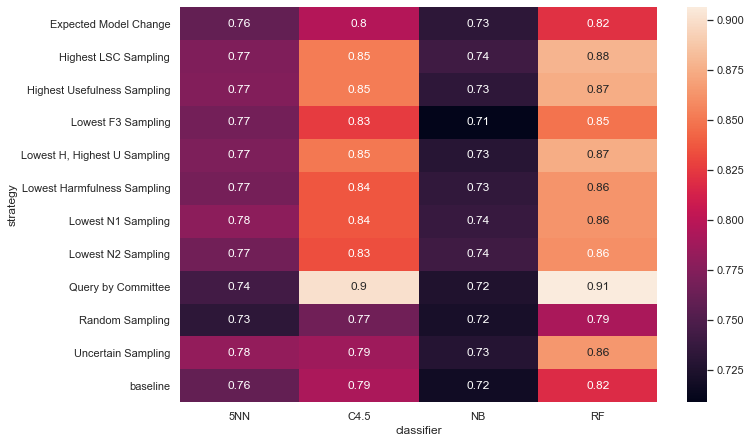

In [16]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)